In [2]:
# Umesh Dhakal  
## MSCS634L1  
## Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebooks


In [3]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Loading the kaggle dataset we downloaded the dataset
data = pd.read_csv(r"C:\Users\umesh\Customer Sale Dataset for Visualization.csv")

# Showing the first 5 rows
data.head()


,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
0,Allison Hill,2025-02-04,Electronics,372.07,1,True,2025,2,1,241.07
1,Megan Mcclain,2025-01-14,Books,369.55,3,True,2025,1,1,103.55
2,Allen Robinson,2025-03-20,Groceries,19.75,1,True,2025,3,3,16.75
3,Cristian Santos,2025-03-27,Books,303.00,9,True,2025,3,3,83.00
4,Kevin Pacheco,2025-01-02,Groceries,227.36,4,False,2025,1,3,78.36


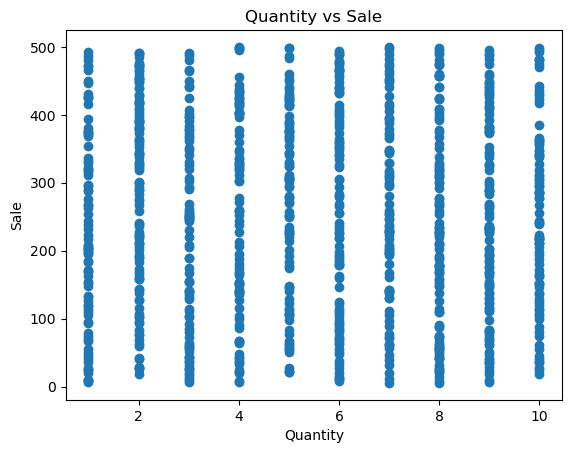

In [5]:
# Scatter plot: Quantity vs Sale
plt.scatter(data["Quantity"], data["Sale"])
plt.xlabel("Quantity")
plt.ylabel("Sale")
plt.title("Quantity vs Sale")
plt.show()



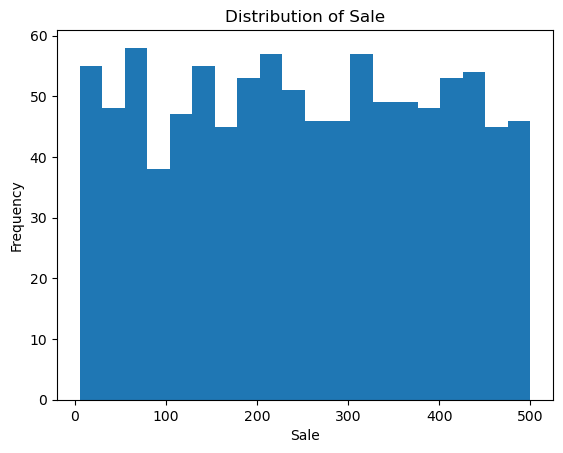

In [6]:
# Histogram
plt.hist(data["Sale"], bins=20)
plt.xlabel("Sale")
plt.ylabel("Frequency")
plt.title("Distribution of Sale")
plt.show()


In [7]:
data.isnull().sum()


Customer Name       0
Purchase Date       0
Product Category    0
Sale                0
Quantity            0
Discount Applied    0
Purchase Year       0
Purchase Month      0
Purchase Day        0
Price               0
dtype: int64

In [8]:
# Filling the numeric columns with mean
data["Sale"] = data["Sale"].fillna(data["Sale"].mean())
data["Quantity"] = data["Quantity"].fillna(data["Quantity"].mean())
data["Price"] = data["Price"].fillna(data["Price"].mean())

# Filling the categorical column with mode
data["Product Category"] = data["Product Category"].fillna(
    data["Product Category"].mode()[0]
)

data.head()



,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
0,Allison Hill,2025-02-04,Electronics,372.07,1,True,2025,2,1,241.07
1,Megan Mcclain,2025-01-14,Books,369.55,3,True,2025,1,1,103.55
2,Allen Robinson,2025-03-20,Groceries,19.75,1,True,2025,3,3,16.75
3,Cristian Santos,2025-03-27,Books,303.00,9,True,2025,3,3,83.00
4,Kevin Pacheco,2025-01-02,Groceries,227.36,4,False,2025,1,3,78.36


In [9]:
Q1 = data["Sale"].quantile(0.25)
Q3 = data["Sale"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower, upper


(np.float64(130.7475),
 np.float64(375.015),
 np.float64(244.26749999999998),
 np.float64(-235.65375),
 np.float64(741.41625))

In [10]:
data = data[(data["Sale"] >= lower) & (data["Sale"] <= upper)]

data.head()


,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
0,Allison Hill,2025-02-04,Electronics,372.07,1,True,2025,2,1,241.07
1,Megan Mcclain,2025-01-14,Books,369.55,3,True,2025,1,1,103.55
2,Allen Robinson,2025-03-20,Groceries,19.75,1,True,2025,3,3,16.75
3,Cristian Santos,2025-03-27,Books,303.00,9,True,2025,3,3,83.00
4,Kevin Pacheco,2025-01-02,Groceries,227.36,4,False,2025,1,3,78.36


In [11]:
# Takeing 20% of the data
small_data = data.sample(frac=0.2, random_state=1)

small_data.head()


,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
507,Felicia Krueger,2025-01-03,Books,41.15,10,False,2025,1,4,39.15
818,Eugene Baldwin,2025-05-02,Clothing,440.67,9,False,2025,5,4,355.67
452,Casey Gillespie,2025-06-05,Clothing,490.05,2,False,2025,6,3,295.05
368,Sergio Gomez,2025-06-05,Clothing,5.77,7,False,2025,6,3,4.77
242,Brent Clay Jr.,2025-03-12,Books,455.27,2,False,2025,3,2,219.27


In [12]:
# Droping less relevant column
small_data = small_data.drop(columns=["Customer Name"])

small_data.head()


,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
507,2025-01-03,Books,41.15,10,False,2025,1,4,39.15
818,2025-05-02,Clothing,440.67,9,False,2025,5,4,355.67
452,2025-06-05,Clothing,490.05,2,False,2025,6,3,295.05
368,2025-06-05,Clothing,5.77,7,False,2025,6,3,4.77
242,2025-03-12,Books,455.27,2,False,2025,3,2,219.27


In [13]:
# Min-Max scaling for Sale
small_data["Sale_Scaled"] = (
    small_data["Sale"] - small_data["Sale"].min()
) / (
    small_data["Sale"].max() - small_data["Sale"].min()
)

small_data[["Sale", "Sale_Scaled"]].head()


,Sale,Sale_Scaled
507,41.15,0.072145
818,440.67,0.886827
452,490.05,0.987520
368,5.77,0.000000
242,455.27,0.916599


In [15]:
# Converting Sale into categories
small_data["Sale_Category"] = pd.cut(
    small_data["Sale"],
    bins=3,
    labels=["Low", "Medium", "High"]
)

small_data[["Sale", "Sale_Category"]].head()


,Sale,Sale_Category
507,41.15,Low
818,440.67,High
452,490.05,High
368,5.77,Low
242,455.27,High


In [36]:
small_data.info()
small_data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 507 to 207
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Purchase Date     200 non-null    object  
 1   Product Category  200 non-null    object  
 2   Sale              200 non-null    float64 
 3   Quantity          200 non-null    int64   
 4   Discount Applied  200 non-null    bool    
 5   Purchase Year     200 non-null    int64   
 6   Purchase Month    200 non-null    int64   
 7   Purchase Day      200 non-null    int64   
 8   Price             200 non-null    float64 
 9   Sale_Scaled       200 non-null    float64 
 10  Sale_Category     200 non-null    category
dtypes: bool(1), category(1), float64(3), int64(4), object(2)
memory usage: 16.1+ KB


,Sale,Quantity,Purchase Year,Purchase Month,Purchase Day,Price,Sale_Scaled
count,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000
mean,238.591350,5.595000,2025.0,3.175000,3.090000,126.396350,0.474758
std,143.286687,3.012699,0.0,1.538248,1.870668,106.075105,0.292183
min,5.770000,1.000000,2025.0,1.000000,0.000000,4.770000,0.000000
25%,109.627500,3.000000,2025.0,2.000000,2.000000,43.620000,0.211781
50%,231.945000,6.000000,2025.0,3.000000,3.000000,94.895000,0.461205
75%,358.197500,8.000000,2025.0,5.000000,5.000000,177.132500,0.718653
max,496.170000,10.000000,2025.0,6.000000,6.000000,467.540000,1.000000


In [37]:
small_data["Sale"].min()
small_data["Sale"].max()
small_data["Sale"].mean()
small_data["Sale"].median()
small_data["Sale"].mode()


0    210.15
Name: Sale, dtype: float64

In [38]:
range_val = small_data["Sale"].max() - small_data["Sale"].min()
variance_val = small_data["Sale"].var()
std_val = small_data["Sale"].std()
iqr_val = small_data["Sale"].quantile(0.75) - small_data["Sale"].quantile(0.25)

range_val, variance_val, std_val, iqr_val


(490.40000000000003, 20531.07467203768, 143.28668700209968, np.float64(248.57))

In [39]:
small_data.corr(numeric_only=True)


,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price,Sale_Scaled
Sale,1.000000,-0.023622,0.083857,NaN,0.061072,0.052804,0.714703,1.000000
Quantity,-0.023622,1.000000,0.017673,NaN,-0.032340,0.054649,0.065178,-0.023622
Discount Applied,0.083857,0.017673,1.000000,NaN,0.066163,0.004395,0.051348,0.083857
Purchase Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Month,0.061072,-0.032340,0.066163,NaN,1.000000,0.041650,0.066168,0.061072
Purchase Day,0.052804,0.054649,0.004395,NaN,0.041650,1.000000,-0.032792,0.052804
Price,0.714703,0.065178,0.051348,NaN,0.066168,-0.032792,1.000000,0.714703
Sale_Scaled,1.000000,-0.023622,0.083857,NaN,0.061072,0.052804,0.714703,1.000000
